In [1]:
import matplotlib.pyplot as plt
from pygom import Transition, TransitionType, ode_utils, SimulateOde
import numpy

In [2]:
# setup the dask cluster
from dask.distributed import Client, progress
client = Client(n_workers=4, threads_per_worker=1)

D:\Programs\Anaconda\envs\crystal_cast_3_7\lib\site-packages\distributed\utils.py:138: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [WinError 10051] A socket operation was attempted to an unreachable network
  RuntimeWarning,


In [3]:
stateList = ['a', 'x', 'y', 'b']
paramList = ['k0', 'k1', 'k2']
transitionList = [
                    Transition(origin='a', destination='x', equation='k0*a*x', transition_type=TransitionType.T),
                    Transition(origin='x', destination='y', equation='k1*x*y', transition_type=TransitionType.T),
                    Transition(origin='y', destination='b', equation='k2*y', transition_type=TransitionType.T)
                    ]

In [4]:
ode = SimulateOde(stateList, paramList, transition=transitionList)
x0 = [150.0, 10.0, 10.0, 0.0]
t = numpy.linspace(0, 15, 100)
ode.initial_values = (x0, t[0])
ode.parameters = [0.01, 0.1, 1.0]
#solution = ode.integrate(t[1::])
#ode.plot()

In [5]:
simX, simT = ode.simulate_jump(t[1::], 50, full_output=True, parallel=True)

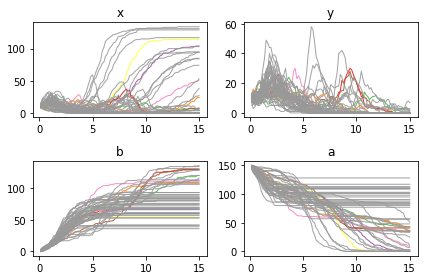

In [6]:
ode.plot(simX, simT)

In [7]:
client

Client Scheduler: tcp://127.0.0.1:60456 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 4 Memory: 34.17 GB
